In [1]:
import pandas as pd 
import numpy as np 

path = './Leads Data - Hiba.xlsx'

data = pd.read_excel(path)
print(data.shape)

(19856, 15)


In [2]:
data.head()

,Leads ID,Name,Country/Region,Language,Channel Type,Channel Source,Leads Batch,Organization,Sales,Leads Status,Allocation Date,Follow Up Status,Feedback,Feedback Remarks,Feedback Time
0,228898,Mohd Hassan bin kamarudin,Malaysia,NaN,Online Event,Facebook,Gold_ST_TH/MY/IN Leads,Head Office/HK Office/HK Sales/Lawrence Lee Team,Current Organization,New Leads,2022-07-22 15:58:04,Not contacted,NaN,NaN,NaN
1,77072,ธนพงษ์ วงศ์จันทร์,Thailand,NaN,Landing page,IV Promotion,IV20211014_100_TH,Head Office/HK Office/HK Sales/Lawrence Lee Team,Current Organization,New Leads,2022-07-22 15:58:41,Not contacted,NaN,NaN,NaN
2,75929,Kittisak Panphueng,Thailand,NaN,Landing page,IV Promotion,IV20211014_100_TH,Head Office/HK Office/HK Sales/Lawrence Lee Team,Current Organization,New Leads,2022-07-22 15:58:41,Not contacted,NaN,NaN,NaN
3,75927,Phitthawat Sirarat,Thailand,NaN,Landing page,IV Promotion,IV20211014_100_TH,Head Office/HK Office/HK Sales/Lawrence Lee Team,Current Organization,New Leads,2022-07-22 15:58:59,Not contacted,NaN,NaN,NaN
4,75923,Pitukchai pothi,Thailand,NaN,Landing page,IV Promotion,IV20211014_100_TH,Head Office/HK Office/HK Sales/Lawrence Lee Team,Current Organization,New Leads,2022-07-22 15:58:59,Not contacted,NaN,NaN,NaN


In [3]:
data.columns

Index(['Leads ID', 'Name', 'Country/Region', 'Language', 'Channel Type',
       'Channel Source', 'Leads Batch', 'Organization', 'Sales',
       'Leads Status', 'Allocation Date', 'Follow Up Status', 'Feedback',
       'Feedback Remarks', 'Feedback Time'],
      dtype='object')

In [8]:
date_today = pd.to_datetime('today')
print(date_today)
print(type(date_today))

2022-09-10 17:55:46.677117
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [9]:
print(type(data['Allocation Date']) )


<class 'pandas.core.series.Series'>


In [10]:
data['Allocation Date']=pd.to_datetime(data['Allocation Date'])

In [11]:
print(type(data['Allocation Date']))

<class 'pandas.core.series.Series'>


In [22]:
print((date_today-data.loc[1,'Allocation Date'])/np.timedelta64(1,'D') )

50.08131570737269


In [27]:
date_difference=[]
for i in range(data.shape[0]):
    val = int((date_today-data.loc[i,'Allocation Date'])/np.timedelta64(1,'D'))
    date_difference.append(val)
data['Date_diff'] = date_difference
    
    


In [29]:
print(data.columns)
print(data.head())

Index(['Leads ID', 'Name', 'Country/Region', 'Language', 'Channel Type',
       'Channel Source', 'Leads Batch', 'Organization', 'Sales',
       'Leads Status', 'Allocation Date', 'Follow Up Status', 'Feedback',
       'Feedback Remarks', 'Feedback Time', 'Date_diff'],
      dtype='object')
   Leads ID                       Name Country/Region Language  Channel Type  \
0    228898  Mohd Hassan bin kamarudin       Malaysia      NaN  Online Event   
1     77072          ธนพงษ์ วงศ์จันทร์       Thailand      NaN  Landing page   
2     75929         Kittisak Panphueng       Thailand      NaN  Landing page   
3     75927        Phitthawat  Sirarat       Thailand      NaN  Landing page   
4     75923            Pitukchai pothi       Thailand      NaN  Landing page   

  Channel Source             Leads Batch  \
0       Facebook  Gold_ST_TH/MY/IN Leads   
1   IV Promotion       IV20211014_100_TH   
2   IV Promotion       IV20211014_100_TH   
3   IV Promotion       IV20211014_100_TH   
4   IV 

In [31]:
ind = (data['Follow Up Status']=='Not contacted')&(data['Date_diff']>=30)
newData = data[ind]

print(newData.shape)

(14887, 16)


In [35]:
newData[['Follow Up Status','Date_diff']].tail()

,Follow Up Status,Date_diff
19689,Not contacted,50
19690,Not contacted,50
19703,Not contacted,30
19705,Not contacted,50
19782,Not contacted,30


<AxesSubplot:>

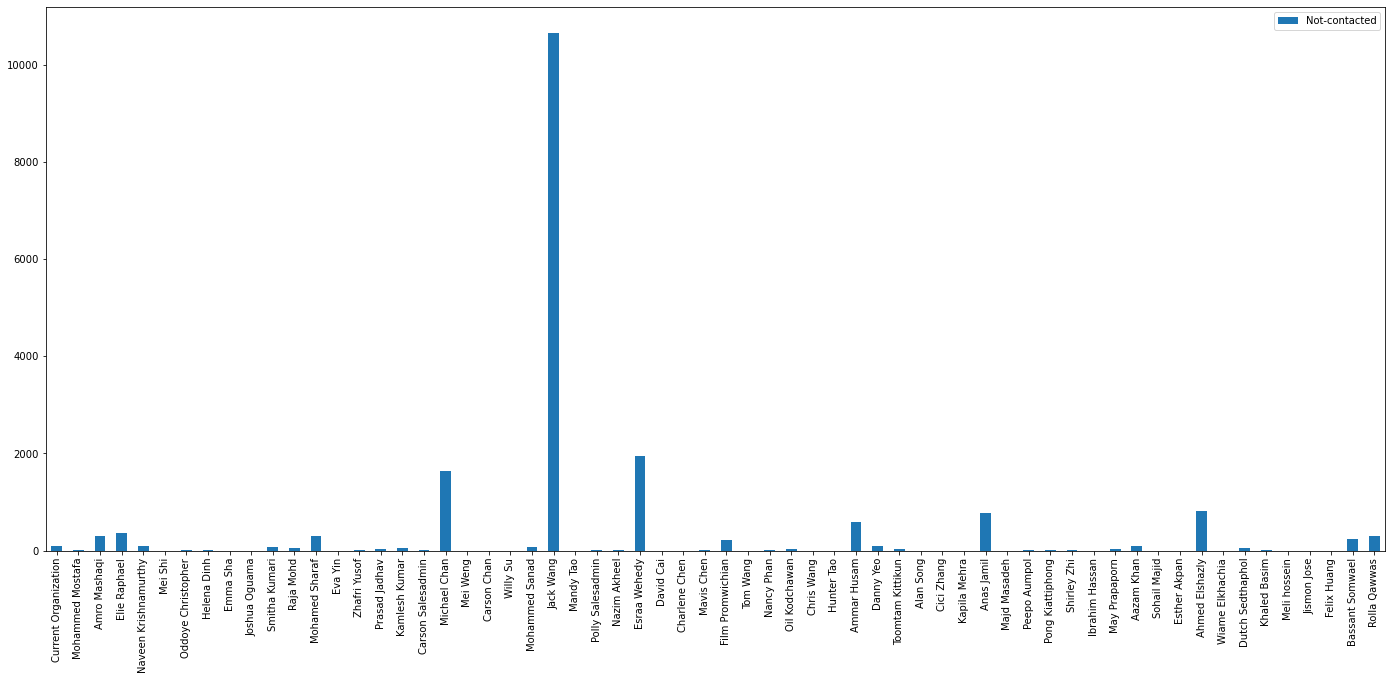

In [56]:
v = newData['Sales'].unique()
res = []
for i in range(v.shape[0]):
    ind = (data['Sales']==v[i])
    res.append(data[ind].shape[0])
res = np.array(res)
res = res.reshape(-1,1)
result = pd.DataFrame(res,index=v,columns=['Not-contacted'])
result.plot(kind='bar',figsize=(24,10))
    

In [53]:
print(res)

[94, 4, 308, 356, 101, 1, 4, 24, 1, 3, 79, 52, 306, 1, 12, 38, 50, 9, 1640, 2, 1, 1, 69, 10650, 1, 7, 5, 1949, 1, 1, 10, 210, 1, 11, 26, 1, 1, 587, 95, 25, 1, 1, 1, 765, 1, 20, 18, 4, 1, 25, 92, 1, 3, 812, 1, 52, 12, 1, 1, 1, 232, 301]
